# Import ALL necessary Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np

torch.manual_seed(1)

# Import Training file into a DataFrame

In [2]:
df = pd.read_csv('/content/hw_3_train_data.csv', header=0)

### Extract Y-Label vocabulary  (Unique words in Target Line)

In [3]:
from itertools import chain

unique_relations = []
for i in range(0,len(df['IOB Slot tags'])):
  unique_relations.append(df['IOB Slot tags'][i].split(' '))

unique_relations = list(set(list(chain.from_iterable( unique_relations ))))
print(unique_relations)
print(len(unique_relations))

['I_producer', 'B_location', 'B_cast', 'B_person', 'B_mpaa_rating', 'B_language', 'I_cast', 'I_country', 'I_language', 'B_country', 'I-movie', 'I_genre', 'B_release_year', 'B_producer', 'I_char', 'B_char', 'B_movie', 'I_subject', 'I_release_year', 'B_director', 'B_genre', 'O', 'I_person', 'I_director', 'B_subject', 'I_mpaa_rating', 'I_movie']
27


### Provide an index to each unique vocab word in Y-Label

In [4]:
vocab2slot = {j:i for i,j in enumerate(unique_relations)}
vocab2slot['PAD'] = 27  # Do !NOT! assign this value randomly. Keep it incremental since we are passing length to model later.
vocab2slot

{'B_cast': 2,
 'B_char': 15,
 'B_country': 9,
 'B_director': 19,
 'B_genre': 20,
 'B_language': 5,
 'B_location': 1,
 'B_movie': 16,
 'B_mpaa_rating': 4,
 'B_person': 3,
 'B_producer': 13,
 'B_release_year': 12,
 'B_subject': 24,
 'I-movie': 10,
 'I_cast': 6,
 'I_char': 14,
 'I_country': 7,
 'I_director': 23,
 'I_genre': 11,
 'I_language': 8,
 'I_movie': 26,
 'I_mpaa_rating': 25,
 'I_person': 22,
 'I_producer': 0,
 'I_release_year': 18,
 'I_subject': 17,
 'O': 21,
 'PAD': 27}

### Split slot tokens and replace the words in the Target (Y) column with the index of unique slots
(Skipping this since we need to encode PAD values as well)

In [ ]:
slots = []

for i in df['IOB Slot tags']:

  slot = [vocab2slot[i.split(' ')[j]] for j in range(0,len(i.split(' ')))]
  slots.append(slot)

print(slots)

### Tokenize and Display Input Sentences (X-Label - Feature)

In [ ]:
sentences = []

for i in df['utterances']:

  sentence = [i.split(' ')[j] for j in range(0,len(i.split(' ')))]
  sentences.append(sentence)

print(sentences)

### Extract X-Label vocabulary (Unique words of feature sentences)

In [7]:
sentence_vocab = list(set(list(chain.from_iterable( sentences ))))
sentence_vocab

['please',
 'selena',
 'them',
 'nick',
 't',
 'people',
 'background',
 'by',
 'hard',
 'seattle',
 'darla',
 'ghost',
 'inception',
 'hanks',
 'as',
 'make',
 'out',
 'magic',
 'law',
 'thing',
 'sandlot',
 'japanese',
 'streisand',
 'several',
 'wizard',
 'filmography',
 'stories',
 'for',
 'depp',
 'blind',
 'singer',
 'list',
 'short',
 'landau',
 'castmembers',
 's',
 'language',
 'campaign',
 'origin',
 'work',
 'charlie',
 'anything',
 'complete',
 'cusack',
 'relase',
 'in',
 'house',
 'floats',
 '7',
 'gibson',
 'blanca',
 'high',
 'apocolypse',
 'solo',
 'columbus',
 'costars',
 'immigrants',
 'come',
 'belle',
 'guido',
 'oliver',
 'person',
 'sheen',
 'ice',
 'stars',
 'scorscese',
 'clark',
 'stewart',
 'kannada',
 'this',
 '-a',
 'experience',
 'pay',
 'africa',
 'possessed',
 'interested',
 'zealand',
 'grease',
 'hungarian',
 'deer',
 'woody',
 'kareena',
 'best',
 'voice',
 'jon',
 'copolla',
 'ranam',
 'avergers',
 'barbra',
 'degeneres',
 'network',
 'halloween',
 '

### Provide a index to each unique vocab word in X-Label

In [8]:
vocab2sent = {j:i for i,j in enumerate(sentence_vocab)}
vocab2sent['PAD'] = 1147 # Do !NOT! assign this value randomly. Keep it incremental since we are passing length to model later.
vocab2sent['UNK'] = 1148
vocab2sent

{'please': 0,
 'selena': 1,
 'them': 2,
 'nick': 3,
 't': 4,
 'people': 5,
 'background': 6,
 'by': 7,
 'hard': 8,
 'seattle': 9,
 'darla': 10,
 'ghost': 11,
 'inception': 12,
 'hanks': 13,
 'as': 14,
 'make': 15,
 'out': 16,
 'magic': 17,
 'law': 18,
 'thing': 19,
 'sandlot': 20,
 'japanese': 21,
 'streisand': 22,
 'several': 23,
 'wizard': 24,
 'filmography': 25,
 'stories': 26,
 'for': 27,
 'depp': 28,
 'blind': 29,
 'singer': 30,
 'list': 31,
 'short': 32,
 'landau': 33,
 'castmembers': 34,
 's': 35,
 'language': 36,
 'campaign': 37,
 'origin': 38,
 'work': 39,
 'charlie': 40,
 'anything': 41,
 'complete': 42,
 'cusack': 43,
 'relase': 44,
 'in': 45,
 'house': 46,
 'floats': 47,
 '7': 48,
 'gibson': 49,
 'blanca': 50,
 'high': 51,
 'apocolypse': 52,
 'solo': 53,
 'columbus': 54,
 'costars': 55,
 'immigrants': 56,
 'come': 57,
 'belle': 58,
 'guido': 59,
 'oliver': 60,
 'person': 61,
 'sheen': 62,
 'ice': 63,
 'stars': 64,
 'scorscese': 65,
 'clark': 66,
 'stewart': 67,
 'kannada': 

In [9]:
c = 0
for i in vocab2sent:
  print(c,'--------',i)
  c += 1

0 -------- please
1 -------- selena
2 -------- them
3 -------- nick
4 -------- t
5 -------- people
6 -------- background
7 -------- by
8 -------- hard
9 -------- seattle
10 -------- darla
11 -------- ghost
12 -------- inception
13 -------- hanks
14 -------- as
15 -------- make
16 -------- out
17 -------- magic
18 -------- law
19 -------- thing
20 -------- sandlot
21 -------- japanese
22 -------- streisand
23 -------- several
24 -------- wizard
25 -------- filmography
26 -------- stories
27 -------- for
28 -------- depp
29 -------- blind
30 -------- singer
31 -------- list
32 -------- short
33 -------- landau
34 -------- castmembers
35 -------- s
36 -------- language
37 -------- campaign
38 -------- origin
39 -------- work
40 -------- charlie
41 -------- anything
42 -------- complete
43 -------- cusack
44 -------- relase
45 -------- in
46 -------- house
47 -------- floats
48 -------- 7
49 -------- gibson
50 -------- blanca
51 -------- high
52 -------- apocolypse
53 -------- solo
54 ----

In [10]:
len(vocab2sent)

1149

### Replace the words in the Input Feature (X) column with the index of unique words 
(Skipping this since we need to encode PAD values as well)

In [11]:
# sentences_encoded = []

# for i in df['utterances']:

#   sent_enc = [vocab2sent[i.split(' ')[j]] for j in range(0,len(i.split(' ')))] #Tokenize using proper tokenizer based on use case
#   sentences_encoded.append(sent_enc)

# print(sentences_encoded)

### Basic stats to understand input data

In [12]:
import statistics

lengths = [len(i) for i in sentences]
print("Length of all input sentences:", lengths)
print("Max length of all sentences",len(max(sentences, key=len)))
print("Median of lengths (to see if padding or truncating required)",statistics.median(lengths))

Length of all input sentences: [8, 5, 8, 6, 8, 7, 8, 9, 7, 6, 7, 5, 7, 8, 3, 4, 11, 12, 7, 10, 7, 6, 6, 6, 9, 11, 3, 6, 7, 7, 2, 8, 7, 5, 7, 8, 8, 6, 12, 6, 5, 5, 5, 9, 3, 3, 6, 4, 15, 6, 4, 7, 9, 8, 14, 16, 11, 14, 6, 7, 9, 6, 6, 9, 9, 7, 8, 5, 5, 10, 8, 4, 7, 7, 11, 9, 5, 5, 7, 7, 4, 5, 5, 9, 9, 4, 6, 5, 8, 7, 6, 7, 8, 7, 5, 5, 7, 5, 9, 5, 6, 5, 5, 2, 2, 3, 5, 7, 7, 6, 4, 6, 4, 4, 6, 6, 5, 10, 6, 8, 10, 9, 15, 11, 13, 11, 4, 4, 4, 4, 4, 9, 4, 4, 5, 5, 4, 9, 5, 8, 7, 9, 4, 8, 4, 8, 13, 10, 11, 8, 11, 13, 10, 9, 11, 5, 4, 5, 5, 10, 9, 6, 5, 10, 11, 7, 7, 9, 6, 8, 7, 7, 7, 7, 3, 3, 4, 7, 9, 6, 8, 3, 5, 7, 9, 7, 11, 6, 9, 8, 8, 9, 9, 10, 5, 10, 8, 6, 6, 6, 8, 8, 7, 7, 8, 6, 10, 4, 9, 7, 7, 6, 6, 7, 4, 8, 9, 9, 10, 7, 10, 8, 10, 7, 9, 7, 8, 9, 3, 8, 8, 7, 9, 8, 7, 10, 10, 7, 14, 7, 6, 7, 8, 7, 9, 7, 7, 12, 7, 7, 8, 6, 8, 7, 7, 7, 7, 6, 8, 8, 8, 9, 4, 9, 4, 9, 14, 12, 17, 14, 13, 14, 15, 5, 4, 3, 12, 8, 6, 7, 8, 6, 4, 4, 6, 7, 5, 7, 6, 4, 5, 3, 3, 5, 6, 4, 5, 5, 7, 7, 6, 6, 7, 7, 8, 6, 6, 

###Better to visualize the Frequency Distribution

In [13]:
import nltk
from nltk import FreqDist
fd = FreqDist(lengths)

print(fd.keys(), fd.values())

dict_keys([8, 5, 6, 7, 9, 3, 4, 11, 12, 10, 2, 15, 14, 16, 13, 17, 18, 1, 21]) dict_values([225, 334, 356, 311, 158, 224, 339, 60, 44, 94, 55, 8, 16, 4, 17, 2, 1, 4, 1])


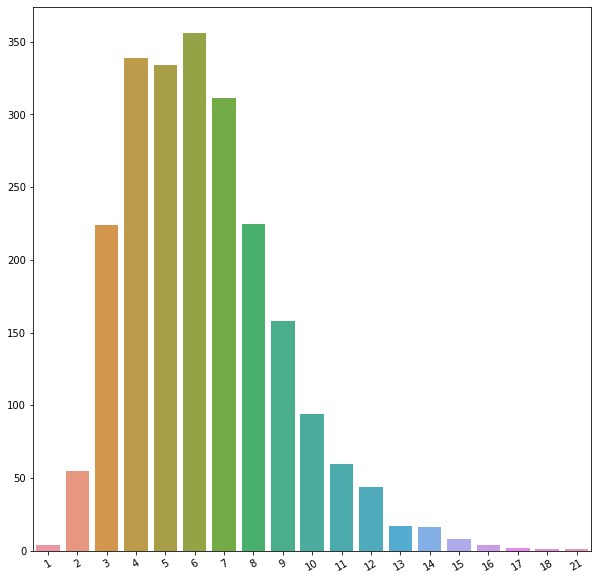

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=list(fd.keys()), y=list(fd.values()), ax=ax)
plt.xticks(rotation=30);

### PAD input sentences to match max length of all sentences (Right padding)

In [15]:
MAX_LEN = len(max(sentences, key=len))

def pad_sequence(sentences,max_len=50):
  for i in range(len(sentences)):
    while len(sentences[i])<max_len:
      sentences[i].append('PAD')

pad_sequence(sentences, max_len=MAX_LEN)

In [16]:
sentences

[['who',
  'plays',
  'luke',
  'on',
  'star',
  'wars',
  'new',
  'hope',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD'],
 ['show',
  'credits',
  'for',
  'the',
  'godfather',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD'],
 ['who',
  'was',
  'the',
  'main',
  'actor',
  'in',
  'the',
  'exorcist',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD'],
 ['who',
  'played',
  'dory',
  'on',
  'finding',
  'nemo',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD'],
 ['who',
  'was',
  'the',
  'female',
  'lead',
  'in',
  'resident',
  'evil',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD',
  'PAD'],
 ['who',
 

In [ ]:
sentences_encoded = []

for i in sentences:
  sent_enc = [vocab2sent[token] for token in i] #Tokenize using proper tokenizer based on use case
  sentences_encoded.append(sent_enc)

print(sentences_encoded)

In [18]:
len(sentences_encoded)

2253

### PAD target labels to match max length of the Y-column word length (Right padding)

In [19]:
MAX_LEN_SLOT = len(max(slots, key=len))

def pad_sequence(slots,max_len=50):
  for i in range(len(slots)):
    while len(slots[i])<max_len:
      slots[i].append(27) # 27 is value assigned above for PAD

pad_sequence(slots, max_len=MAX_LEN_SLOT)

In [20]:
MAX_LEN_SLOT

21

In [21]:
slots

[[21,
  21,
  15,
  21,
  16,
  26,
  26,
  26,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [21,
  21,
  21,
  16,
  26,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [21,
  21,
  21,
  21,
  21,
  21,
  16,
  26,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [21,
  21,
  15,
  21,
  16,
  26,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [21,
  21,
  21,
  21,
  21,
  21,
  16,
  26,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [21,
  21,
  15,
  21,
  16,
  26,
  26,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [21,
  21,
  21,
  21,
  21,
  16,
  26,
  26,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [21,
  21,
  21,
  21,
  21,
  15,
  21,
  16,
  26,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  2

In [22]:
len(slots)

2253

#### TF-IDF (For input sentences) - OPTIONAL

In [23]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# sents = []
# enc = TfidfVectorizer()
# for i in sentences:
#   sents.append(" ".join(i))
# sentences_tfidf = enc.fit_transform(sents)
# print(sentences_tfidf)

In [24]:
# print(enc.get_feature_names())

##### Load TF-IDF values into a DataFrame

In [25]:
# pd.set_option('display.max_colwidth',100)
# df1 = pd.DataFrame(sentences_tfidf.toarray())
# df1.columns = enc.get_feature_names() # Column Names
# df1.index = df['utterances'] # Row Names
# df1

### Model Structure

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [27]:
inputs = [torch.Tensor(sent) for sent in sentences_encoded]
inputs

[tensor([ 163.,  812.,  476.,  321.,  636.,  260.,  286.,  101., 1147., 1147.,
         1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147.,
         1147.]),
 tensor([1007.,  341.,   27.,  694.,  907., 1147., 1147., 1147., 1147., 1147.,
         1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147.,
         1147.]),
 tensor([ 163., 1013.,  694., 1124.,  159.,   45.,  694.,  709., 1147., 1147.,
         1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147.,
         1147.]),
 tensor([ 163.,  645.,  911.,  321.,  790.,  303., 1147., 1147., 1147., 1147.,
         1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147.,
         1147.]),
 tensor([ 163., 1013.,  694.,   96.,  742.,   45.,  518.,  122., 1147., 1147.,
         1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147.,
         1147.]),
 tensor([ 163.,  645.,   59.,   45., 1039.,  966.,  147., 1147., 1147., 1147.,
         1147., 1147., 1147., 1147., 1147

In [28]:
lstm = nn.LSTM(21, 21)  # Input dim is 3, output dim is 3
# inputs = [torch.randn(1, 21) for _ in range(21)]  # make a sequence of length 5

# initialize the hidden state.
hidden = (torch.randn(1, 1, 21),
          torch.randn(1, 1, 21))
for i in inputs:
    # Step through the sequence one element at a time.
    # after each step, hidden contains the hidden state.
    out, hidden = lstm(i.view(1, 1, -1), hidden)

inputs = torch.cat(inputs).view(len(inputs), 1, -1)
hidden = (torch.randn(1, 1, 21), torch.randn(1, 1, 21))  # clean out hidden state
out, hidden = lstm(inputs, hidden)
print(out)
print(hidden)

tensor([[[ 0.0000,  0.1767,  0.7616,  ..., -0.0595,  0.0000, -0.7616]],

        [[ 0.0000,  0.8270,  0.7616,  ...,  0.7616,  0.0000, -0.7616]],

        [[ 0.0000,  0.9747,  0.7616,  ..., -0.5281,  0.0000, -0.7616]],

        ...,

        [[ 0.0000,  1.0000,  0.7616,  ..., -0.7616,  0.0000, -0.7616]],

        [[ 0.0000,  1.0000,  0.7616,  ..., -0.9640,  0.0000, -0.7616]],

        [[ 0.0000,  1.0000,  0.7616,  ..., -0.9951,  0.0000, -0.7616]]],
       grad_fn=<StackBackward0>)
(tensor([[[ 0.0000e+00,  1.0000e+00,  7.6159e-01,  0.0000e+00,  7.4589e-01,
          -7.6159e-01, -0.0000e+00,  0.0000e+00, -9.9766e-11,  7.6159e-01,
          -0.0000e+00,  0.0000e+00, -7.6159e-01, -1.0000e+00,  1.0671e-01,
           0.0000e+00,  0.0000e+00,  0.0000e+00, -9.9505e-01,  0.0000e+00,
          -7.6159e-01]]], grad_fn=<StackBackward0>), tensor([[[ 5.4000e+01,  1.7990e+02,  1.0000e+00,  1.0000e+00,  1.0000e+00,
          -1.0000e+00, -1.0000e+00,  1.0147e+02, -3.6660e+02,  1.0000e+00,
          -

In [29]:
len(out)

2253

In [ ]:
training_data = []

for i in range(0,len(sentences_encoded)):
  training_data.append((sentences_encoded[i],slots[i]))

print(training_data)


In [31]:
# def prepare_sequence(seq, to_ix):
#     idxs = [to_ix[w] for w in seq]
#     return torch.tensor(idxs, dtype=torch.long)


# training_data = list(zip(sentences, slots))

# word_to_ix = {}
# # For each words-list (sentence) and tags-list in each tuple of training_data
# for sent, tags in training_data:
#     for word in sent:
#         if word not in word_to_ix:  # word has not been assigned an index yet
#             word_to_ix[word] = len(word_to_ix)  # Assign each word with a unique index
# print(word_to_ix)



# # tag_to_ix = {"DET": 0, "NN": 1, "V": 2}  # Assign each tag with a unique index

# # These will usually be more like 32 or 64 dimensional.
# # We will keep them small, so we can see how the weights change as we train.


In [32]:
# list1 = [["DET", "NN", "V", "DET", "NN"], ["DET", "NN", "V", "DET", "NN"]]
# list2 = [['a', 'b', 'c','b', 'c'],['a', 'b', 'c','b', 'c']]

# merged_list = list(zip(df1.values.tolist(), slots))
# merged_list

In [33]:
HIDDEN_DIM = 560
EMBEDDING_DIM = 560

In [34]:
xyz = torch.Tensor([1,2,3,4,3,5,7,8,9,9,2])
xyz

tensor([1., 2., 3., 4., 3., 5., 7., 8., 9., 9., 2.])

In [35]:
abc = xyz.view(len(xyz),1,-1)
abc

tensor([[[1.]],

        [[2.]],

        [[3.]],

        [[4.]],

        [[3.]],

        [[5.]],

        [[7.]],

        [[8.]],

        [[9.]],

        [[9.]],

        [[2.]]])

In [36]:
abc.view(len(abc),-1)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [3.],
        [5.],
        [7.],
        [8.],
        [9.],
        [9.],
        [2.]])

In [37]:
from IPython.core.debugger import set_trace

class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [38]:
training_data[0][1]

[21,
 21,
 15,
 21,
 16,
 26,
 26,
 26,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27]

In [39]:
model = LSTMTagger( EMBEDDING_DIM, HIDDEN_DIM, len(vocab2sent), len(vocab2slot))
model.to(device)
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

with torch.no_grad():
    inputs = torch.tensor(training_data[0][1]).to(device)
    tag_scores = model(inputs)
    print(tag_scores)

for epoch in range(300):
    for sentence, tags in training_data:
        #set_trace()
        model.zero_grad()
        sentence_in = torch.tensor(sentence, dtype=torch.long).to(device)
        targets = torch.tensor(tags, dtype=torch.long).to(device)
        tag_scores = model(sentence_in)
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()
        print("Epoch: ",epoch," Loss: ", loss)
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], vocab2sent)
    tag_scores = model(inputs)
    print(tag_scores)

Streaming output truncated to the last 5000 lines.
Epoch:  103  Loss:  tensor(6.8853e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  103  Loss:  tensor(1.7176e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  103  Loss:  tensor(9.0634e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  103  Loss:  tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  103  Loss:  tensor(6.7604e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  103  Loss:  tensor(7.7299e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  103  Loss:  tensor(4.1382e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  103  Loss:  tensor(4.1382e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  103  Loss:  tensor(2.2435e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  103  Loss:  tensor(1.5893e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  103  Loss:  tensor(1.5876e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  103  Loss:  tensor(3.

KeyboardInterrupt: ignored

In [40]:
df_test = pd.read_csv('/content/test_data.csv', header=0)
df_test["utterances"]

0                                           star of thor
1                       who is in the movie the campaign
2                list the cast of the movie the campaign
3                                    who was in twilight
4                                     who is in vulguria
                             ...                        
976                     trailer for star wars a new hope
977              show resident evil movies with trailers
978    can i see previews for upcoming warner brother...
979    how many woody allen movies are set in new yor...
980        how many scorsese films were filmed in france
Name: utterances, Length: 981, dtype: object

In [41]:
word_vocab_filter = [i for i in list(vocab2sent.keys()) if len(i) > 4]
word_vocab_filter

['please',
 'selena',
 'people',
 'background',
 'seattle',
 'darla',
 'ghost',
 'inception',
 'hanks',
 'magic',
 'thing',
 'sandlot',
 'japanese',
 'streisand',
 'several',
 'wizard',
 'filmography',
 'stories',
 'blind',
 'singer',
 'short',
 'landau',
 'castmembers',
 'language',
 'campaign',
 'origin',
 'charlie',
 'anything',
 'complete',
 'cusack',
 'relase',
 'house',
 'floats',
 'gibson',
 'blanca',
 'apocolypse',
 'columbus',
 'costars',
 'immigrants',
 'belle',
 'guido',
 'oliver',
 'person',
 'sheen',
 'stars',
 'scorscese',
 'clark',
 'stewart',
 'kannada',
 'experience',
 'africa',
 'possessed',
 'interested',
 'zealand',
 'grease',
 'hungarian',
 'woody',
 'kareena',
 'voice',
 'copolla',
 'ranam',
 'avergers',
 'barbra',
 'degeneres',
 'network',
 'halloween',
 'childs',
 'norway',
 'spike',
 'chips',
 'female',
 'moives',
 'information',
 'rings',
 'generate',
 'vidor',
 'recently',
 'exhibit',
 'fellows',
 'swayze',
 'deniro',
 'driver',
 'chaser',
 'prison',
 'czech'

In [53]:
# TEST - Print UNK Words
!pip install fuzzywuzzy
!pip install python-Levenshtein

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

test_sents_autocorrected = []
index = 0

count_unk = 0
for i in df_test["utterances"]:
  onesentence = []
  for j in i.split():
    if j in list(vocab2sent.keys()):
      onesentence.append(j)
      index += 1
      #print(j)
    elif process.extractOne(j, word_vocab_filter)[1] > 85 and len(j) > 4 and j not in ["seven","amount","created","mother","hitchcook","research","roman","who's","previews"]:
      count_unk += 1
      onesentence.append(process.extractOne(j, word_vocab_filter)[0])
      index += 1
      print(index, " : ", j, " Modified to -->",process.extract(j, word_vocab_filter)[0])
    else:
      onesentence.append("UNK")
      index += 1
      print(index, " : ", j,"---> UNK")
  test_sents_autocorrected.append(onesentence)

print(count_unk)
# ----------

print(test_sents_autocorrected)

26  :  vulguria  Modified to --> ('vulgaria', 88)
55  :  who's ---> UNK
70  :  's ---> UNK
110  :  lassie ---> UNK
116  :  midnight  Modified to --> ('night', 90)
117  :  cowboy ---> UNK
207  :  parts ---> UNK
211  :  searching  Modified to --> ('search', 90)
218  :  appollo  Modified to --> ('appolo', 92)
280  :  's ---> UNK
463  :  deep ---> UNK
464  :  blue ---> UNK
465  :  sea ---> UNK
474  :  lear ---> UNK
491  :  begin  Modified to --> ('begins', 91)
492  :  acting ---> UNK
507  :  movie's  Modified to --> ('movie', 95)
529  :  roman ---> UNK
530  :  holiday ---> UNK
577  :  acting ---> UNK
581  :  going ---> UNK
715  :  hit ---> UNK
720  :  fun ---> UNK
721  :  size ---> UNK
727  :  django ---> UNK
728  :  unchained ---> UNK
735  :  able ---> UNK
792  :  created ---> UNK
807  :  dirctor  Modified to --> ('director', 93)
816  :  nacho ---> UNK
817  :  libre ---> UNK
863  :  second ---> UNK
909  :  million  Modified to --> ('millionaire', 90)
910  :  dollar ---> UNK
911  :  baby -

4681  :  swahili ---> UNK
4701  :  anniston  Modified to --> ('aniston', 93)
4710  :  m ---> UNK
4712  :  raju ---> UNK
4716  :  created ---> UNK
4721  :  = ---> UNK
4730  :  your ---> UNK
4734  :  thousand ---> UNK
4739  :  thousand ---> UNK
4746  :  2012 ---> UNK
4750  :  minus ---> UNK
4766  :  nr ---> UNK
4800  :  30 ---> UNK
4815  :  unrated ---> UNK
4819  :  1995 ---> UNK
4821  :  adam ---> UNK
4822  :  sandler ---> UNK
4830  :  rickmman  Modified to --> ('rickman', 93)
4838  :  season ---> UNK
4866  :  max ---> UNK
4867  :  von ---> UNK
4868  :  sudow ---> UNK
4878  :  grey ---> UNK
4891  :  nineteen ---> UNK
4892  :  eighty  Modified to --> ('eight', 91)
4893  :  seven ---> UNK
4904  :  sharukh ---> UNK
4905  :  khan ---> UNK
4912  :  becon ---> UNK
4915  :  together ---> UNK
4918  :  animals ---> UNK
4923  :  bollywood  Modified to --> ('hollywood', 89)
4936  :  disco ---> UNK
4940  :  offer ---> UNK
4941  :  tips ---> UNK
4943  :  gardening ---> UNK
4951  :  hair ---> UNK
495

In [54]:
test_sents_autocorrected

[['star', 'of', 'thor'],
 ['who', 'is', 'in', 'the', 'movie', 'the', 'campaign'],
 ['list', 'the', 'cast', 'of', 'the', 'movie', 'the', 'campaign'],
 ['who', 'was', 'in', 'twilight'],
 ['who', 'is', 'in', 'vulgaria'],
 ['actor', 'from', 'lost'],
 ['who', 'played', 'in', 'the', 'movie', 'rocky'],
 ['who', 'played', 'in', 'the', 'movie', 'captain', 'america'],
 ['cast', 'and', 'crew', 'for', 'in', 'july'],
 ['who', 'is', 'in', 'movie', 'in', 'july'],
 ['UNK', 'in', 'star', 'wars', 'episode', 'four'],
 ['who', 'was', 'in', 'apollo', 'thirteen'],
 ['who', 'was', 'apollo', 'thirteen', 'UNK', 'cast'],
 ['search',
  'for',
  'information',
  'about',
  'the',
  'cast',
  'and',
  'crew',
  'of',
  'appolo',
  'thirteen'],
 ['i',
  'would',
  'like',
  'to',
  'know',
  'more',
  'about',
  'the',
  'cast',
  'and',
  'crew',
  'of',
  'the',
  'movie',
  'apollo',
  'thirteen'],
 ['who', 'starred', 'in', 'the', 'avengers'],
 ['cast', 'for', 'finding', 'nemo'],
 ['actor', 'from', 'UNK'],
 ['li

In [ ]:
test_sents = []

for i in test_sents_autocorrected:
  test_sents.append([vocab2sent[j] for j in i])

def pad_sequence(test_sents,max_len=50):
  for i in range(len(test_sents)):
    while len(test_sents[i])<max_len:
      test_sents[i].append(vocab2sent["PAD"])

pad_sequence(test_sents, max_len=MAX_LEN)

print(test_sents)

In [ ]:
test_preds = []

for i in range(0,len((test_sents))):
  predn = torch.LongTensor(test_sents[i]).to(device)
  pred = model(predn).detach()
  _, predicted = torch.max(pred, 1)
  test_preds.append(predicted.tolist())

print(test_preds)

In [57]:
test_preds = list(chain.from_iterable(test_preds))
test_preds = [list(vocab2slot.keys())[list(vocab2slot.values()).index(i)] for i in test_preds]
test_preds

['O',
 'O',
 'B_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B_movie',
 'I_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B_movie',
 'I_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'O',
 'B_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'O',
 'B_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'B_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 '

In [ ]:
temp2 = [i for i in test_preds if i != 'PAD']
print(temp2)
temp1 = [j for j in range(0,6415)]
print(temp1)

In [59]:
dftocsv = pd.DataFrame({'Id': temp1, 'Predicted': temp2}, columns=['Id', 'Predicted'])
dftocsv

,Id,Predicted
0,0,O
1,1,O
2,2,B_movie
3,3,O
4,4,O
...,...,...
6410,6410,O
6411,6411,O
6412,6412,O
6413,6413,O


In [60]:
dftocsv.to_csv("kagle_submission.csv")